In [1]:
using Flux
using Statistics
using Base.Iterators: repeated, partition
using HDF5
using StatsPlots
using Random
using Printf
using JLD2

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1260
┌ Info: Precompiling HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
└ @ Base loading.jl:1260


In [1]:
pwd()

"/afs/desy.de/user/a/albertal/MLPractice"

In [2]:
@load ("Momsskaon") Momsskaon
@load ("Momsspion") Momsspion
@load ("TOFsskaon") TOFsskaon
@load ("TOFsspion") TOFsspion

1-element Array{Symbol,1}:
 :TOFsspion

In [3]:
m = Chain(Dense(1,5; initW=Flux.glorot_normal, initb=Flux.glorot_normal),
 Dense(5, 100, celu),
    Dense(100, 100, tanh),
    Dense(100, 5, celu),
    Dense(5, 1)
)

Chain(Dense(1, 5), Dense(5, 100, celu), Dense(100, 100, tanh), Dense(100, 5, celu), Dense(5, 1))

In [4]:
# this loss is the mean square error of the prediction
loss(x, y) = Flux.mse(m(x), y)

loss (generic function with 1 method)

In [5]:
inputdata = reshape(Momsskaon,(1,length(TOFsskaon)))

1×19820 Array{Float64,2}:
 7.57695  1.95542  6.20755  2.15172  …  1.55832  4.004  1.48687  2.44257

In [6]:
dataset = Flux.Data.DataLoader((inputdata[:,1001:end], TOFsskaon[1001:end]), shuffle=true)

Flux.Data.DataLoader{Tuple{Array{Float64,2},Array{Float64,1}}}(([2.2227127011764476 2.77565832202682 … 1.4868650125571548 2.4425652995618248], [6.639701843261719, 4.763355731964111, 5.312546253204346, 4.8885040283203125, 4.950521469116211, 6.364657878875732, 4.754236698150635, 7.978337287902832, 4.369724750518799, 4.259682655334473  …  4.338921070098877, 4.341794967651367, 5.24114990234375, 4.502242565155029, 5.528768539428711, 5.651243686676025, 5.351472854614258, 4.567007541656494, 5.410121917724609, 5.794447422027588]), 1, 18820, true, 18820, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  18811, 18812, 18813, 18814, 18815, 18816, 18817, 18818, 18819, 18820], true)

In [7]:
function plotdata()
    scatter(inputdata[1,1:1000], TOFsskaon[1:1000], title = "Time of Flight (0-10 ns) vs Momentum (from PFOs)", 
    xlabel = "Momentum (GeV)", ylabel = "Time of Flight (ns)", 
    label = "kaons", ms = 1.0, markerstrokewidth = 0 )
    scatter!(inputdata[1,1:1000], m(inputdata[:,1:1000])', ms = 0.1, markerstrokewidth = 0.0)
end

plotdata (generic function with 1 method)

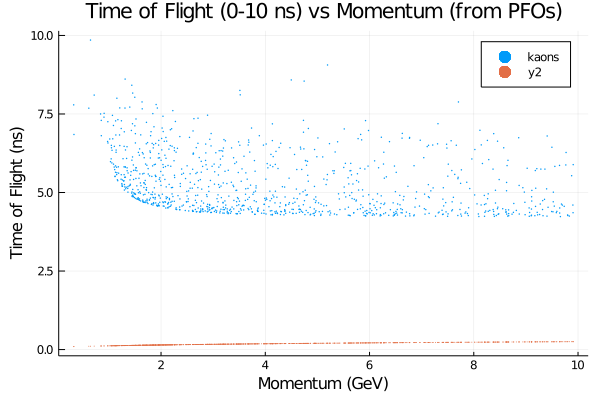

In [8]:
plotdata()

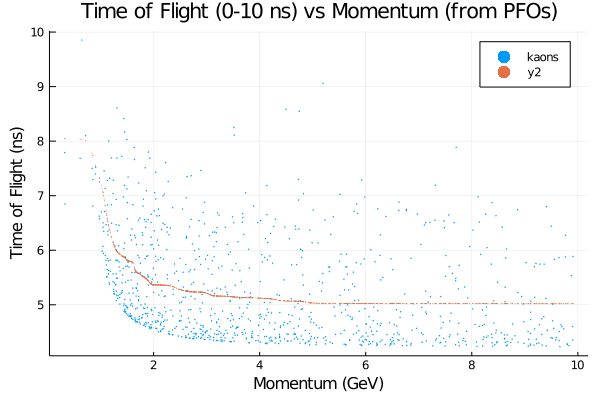

In [9]:
lr = 0.001
for epoch in 1:100
    opt = ADAM(lr)
    Flux.train!(loss, params(m), dataset, opt)
#     @show(epoch, loss2(testData, testLabels))
    IJulia.clear_output(true)
    
    display(plotdata())
#     savefig(@sprintf "calibratedEnergy_epoch_%03d.pdf" epoch)
#     animateDataInOne(m(testData), 1, testLabels)
#     savefig(@sprintf "calibratedEnergyInOne_epoch_%03d.pdf" epoch)
end
